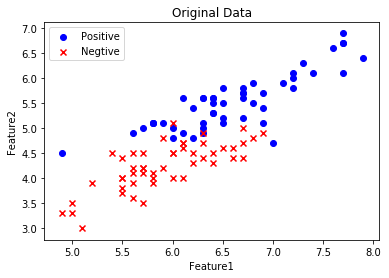

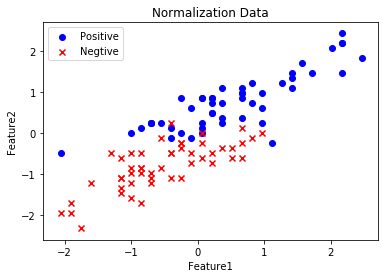

 0 update, number of fault classification is: 81
 1 update, number of fault classification is: 21
The  1 classification, fault number is : 21
 2 update, number of fault classification is: 21
The  2 classification, fault number is : 21
 3 update, number of fault classification is: 21
The  3 classification, fault number is : 21
 4 update, number of fault classification is: 21
The  4 classification, fault number is : 21
 5 update, number of fault classification is: 21
The  5 classification, fault number is : 21
 6 update, number of fault classification is: 21
The  6 classification, fault number is : 21
 7 update, number of fault classification is: 21
The  7 classification, fault number is : 21
 8 update, number of fault classification is: 21
The  8 classification, fault number is : 21
 9 update, number of fault classification is: 21
The  9 classification, fault number is : 21
10 update, number of fault classification is: 21
The 10 classification, fault number is : 21
11 update, number of 

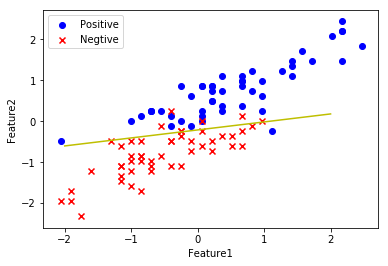

count  7 
len of y 99
accuracy is 0.07


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_csv("data1.csv", header=None)
# X = data.iloc[:,:2].values
# y = data.iloc[:,-1].values

def readData(file):
    rawdata = pd.read_csv(file)
    data = rawdata.values
#     x0 = np.ones((data.shape[0], 1))
#     data = np.c_[x0, data]
    n, m = data.shape
    return data[:,:-1], data[:, -1], n, m

def drawdata(X1, X2, X3, X4,title):
    plt.scatter(X1, X2, color='blue', marker='o', label='Positive')
    plt.scatter(X3, X4, color='red', marker='x', label='Negtive')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

def countFault(X, y, w):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    compared = np.where(y != y_pred)
    num_fault = len(compared[0])
    return num_fault, compared

def pla(X, y, n, m):
    #X add X0 to ones
    X = np.hstack((np.ones((n,1)), X))
    #initial w
    w = np.random.randn(m, 1)

    for i in range(n):
        num_fault, compared = countFault(X, y, w)
        print('%2d update, number of fault classification is: %2d' %(i, num_fault))
        if num_fault == 0:
            break
        else:
            r = np.random.choice(num_fault)
            t = compared[0][r]
            w2 = w + y[t] * X[t,:].reshape((3,1))
            
            num_fault2,_ = countFault(X, y, w2)
            if num_fault2 < num_fault:
                w = w2
            else:
                print('The %2d classification, fault number is : %2d' % (i, num_fault))
            

    x1 = -2
    y1 = -1 / w[2] *(w[0] * 1 + w[1] * x1)

    x2 = 2
    y2 = -1 / w[2] * (w[0]* 1 + w[1] * x2)
    plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
    plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negtive')
    plt.plot([x1,x2], [y1, y2], 'y')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(loc='upper left')

    plt.show()
    
    # calculate accuracy
    count,_ = countFault(X, y, w)
    print ("count %2d " % count)
    print ("len of y %d" % len(y))
    accuracy = count / len(y)
    print("accuracy is %.2f" % accuracy)

X, y, n, m = readData('data2.csv')
drawdata(X[:50, 0], X[:50, 1], X[50:, 0], X[50:, 1], "Original Data")

u = np.mean(X, axis=0)
v = np.std(X, axis=0)
X = (X - u) / v
drawdata(X[:50, 0], X[:50, 1], X[50:, 0], X[50:, 1], "Normalization Data")
pla(X, y, n, m)